In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [26]:
data = pd.read_csv('C:\\Users\\Nehal\\Downloads\\USA Housing Dataset.csv')


In [28]:
print("Columns in the dataset:", data.columns)
print(data.head())

Columns in the dataset: Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0 

In [30]:
print("\nMissing values in each column:")
print(data.isnull().sum())




Missing values in each column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [32]:
if 'street' in data.columns:
    data = data.drop(columns=['street'])



In [34]:
data = data.dropna()



In [36]:
X = data.drop(columns=['price', 'date'])  # Drop the target and Date columns
y = data['price']



In [38]:
categorical_columns = ['city', 'statezip', 'country']
X = pd.get_dummies(X, columns=[col for col in categorical_columns if col in X.columns], drop_first=True)


In [40]:
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()



In [42]:
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
model = LinearRegression()


In [48]:
model.fit(X_train, y_train)


LinearRegression()

In [50]:
y_pred = model.predict(X_test)


In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [54]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 49220762774.33
R-squared: 0.53


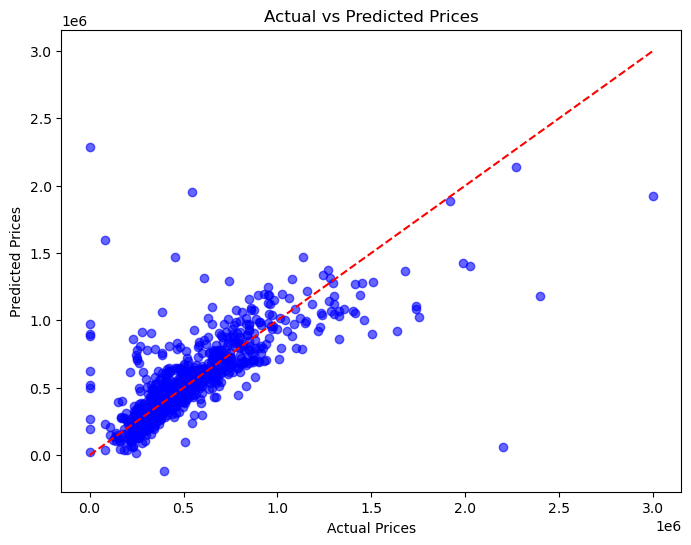

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()



In [58]:
print("\nFirst 5 Actual Prices:")
print(y_test.head())
print("First 5 Predicted Prices:")
print(y_pred[:5])


First 5 Actual Prices:
3487    600000.0
1964    370000.0
1582    471000.0
296     240000.0
149     413000.0
Name: price, dtype: float64
First 5 Predicted Prices:
[758177.93329019 555865.43329019 433989.93329019 274629.93329019
 294853.93329019]
